# LDA-SVM

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")

Text(0.5, 1.0, 'Training data')

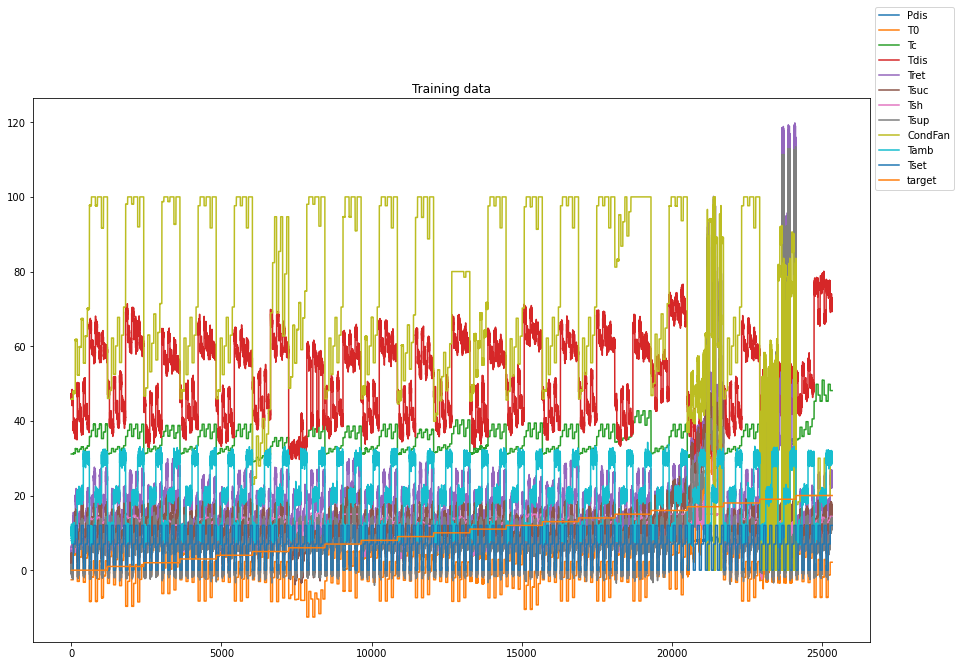

In [20]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data)
plt.legend(train_data.keys(), bbox_to_anchor=(1, 1), loc="center left")
plt.title('Training data')

In [21]:
#standardization
standardize = True

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data)
    tst = standardizer.transform(test_data)
else:
    trn = train_data
    tst = test_data

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset,target
0,-1.032494,-0.511047,-1.088671,-0.356538,-0.979821,-1.115124,-1.154178,-0.792657,-1.038352,-1.395102,-1.286817,0
1,-1.031986,-0.511334,-1.088093,-0.392249,-0.986315,-0.816657,-1.153514,-0.588536,-1.037461,-1.152741,-1.286817,0
2,-1.032595,-0.510996,-1.088786,-0.305495,-0.936532,-1.103815,-1.154308,-0.682936,-1.038529,-1.246715,-1.286817,0
3,-1.032755,-0.510917,-1.088969,-0.313549,-0.846477,-0.981532,-1.154513,-0.753920,-1.038810,-1.410227,-1.286817,0
4,-1.033006,-0.510801,-1.089255,-0.365188,-1.012106,-1.145663,-1.154832,-0.765365,-1.039250,-1.258335,-1.286817,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25321,3.990764,0.066492,3.690410,1.815444,0.253337,0.407120,0.957731,0.289417,-1.654864,1.181980,1.151363,20
25322,3.989952,0.066902,3.689752,1.945870,0.366780,0.445585,0.957077,0.206907,-1.654864,1.169470,1.151363,20
25323,3.989794,0.066986,3.689624,1.788687,0.426260,0.405650,0.956946,0.346351,-1.654864,1.177053,1.151363,20
25324,3.989811,0.066977,3.689638,1.797973,0.450782,0.595406,0.956960,0.184554,-1.654864,1.345689,1.151363,20


# LDA    

Preserving 99.69% of variance


,0,1,2,3,4,target
0,0.004757,-0.045755,0.089389,0.017137,0.006588,0.0
1,-0.000469,0.008813,0.072518,-0.031919,-0.032985,0.0
2,0.001390,-0.046905,0.138526,0.028653,-0.008737,0.0
3,0.003533,-0.033657,0.148509,0.122270,0.028721,0.0
4,0.004092,-0.044128,0.079762,-0.016918,-0.008818,0.0
...,...,...,...,...,...,...
25321,0.476521,-0.317141,-0.120874,-0.013577,-0.381435,20.0
25322,0.476663,-0.383989,-0.024706,0.117220,-0.341047,20.0
25323,0.476955,-0.250092,-0.082129,0.099386,-0.358384,20.0
25324,0.480123,-0.281227,-0.089738,0.176697,-0.321982,20.0


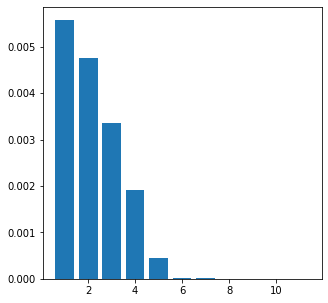

In [22]:
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')
LDA = lda.transform(trn)
LDA_tst = lda.transform(tst)
LDA

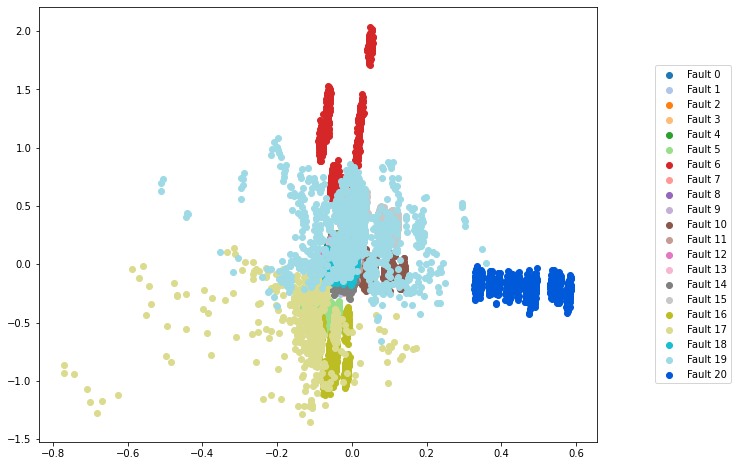

In [23]:
import plot_functions as pf

pf.plot_transformation(pd.DataFrame(LDA).assign(target=train_data['target']),'LDA_data.pdf','target',True,figsize=(10,8))

# SVM

In [24]:
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)
clf_svm.fit(LDA.drop('target',axis=1), labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

In [25]:
predict = clf_svm.predict(LDA.drop('target',axis=1))
predict

array([ 0,  8, 18, ..., 20, 20, 20], dtype=int64)

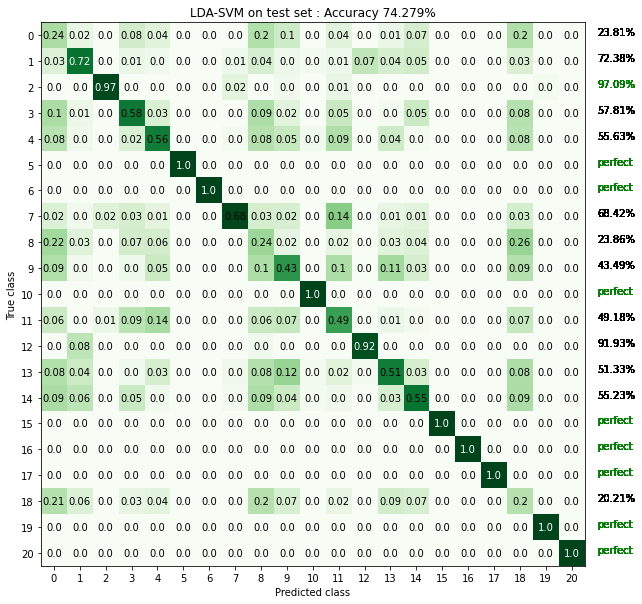

In [26]:
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on test set',save_fig_name='PDF/LDA-SVM confusion matrix.pdf')
pass

In [27]:
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))
predict_tst

array([ 1,  9,  8, ..., 20, 20, 20], dtype=int64)

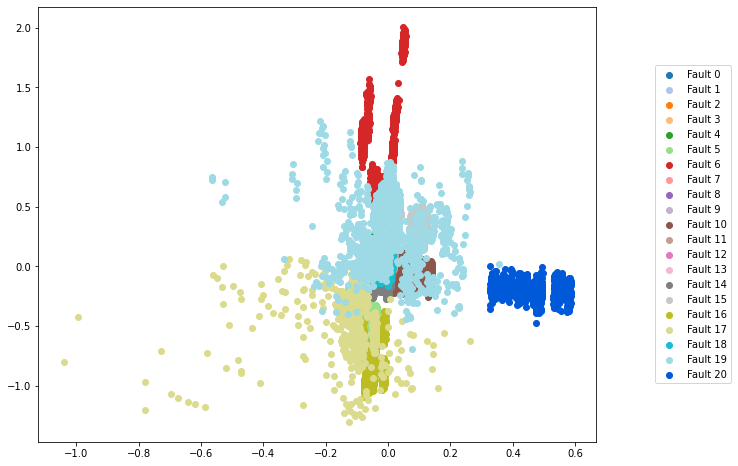

In [28]:
pf.plot_transformation(pd.DataFrame(LDA_tst).assign(target=test_data['target']),'LDA_val.pdf','target',True,figsize=(10,8))

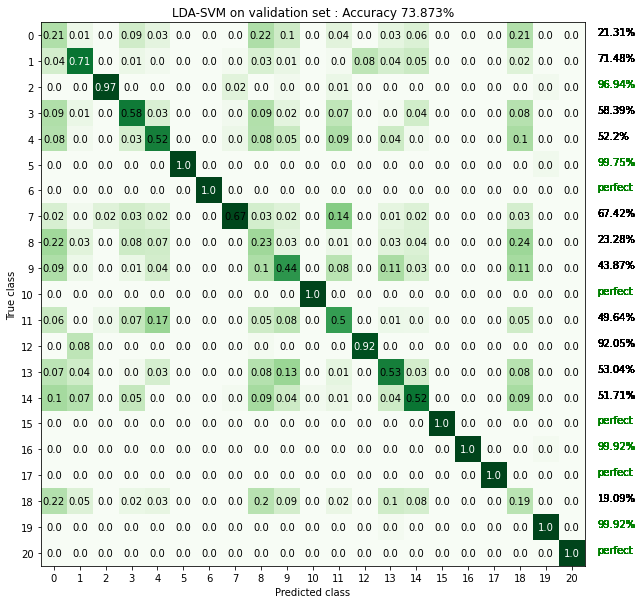

In [29]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on validation set',save_fig_name='PDF/LDA-SVM confusion matrix Validation.pdf')
pass

# LDA-SVM
Dataset: fault_all_noise_67.csv<br>
Standardized to mean 0 variance 1 (our implementation)<br>
LDA reduced to 5 dimensions (our implementation)<br>
SVM: C = 1000 gamma = 0.01 decision function = 'ovo'<br>

Accuracy on training set:   74.279%     false positive: 76.19%<br>
Accuracy on test set:       73.873%     false positive: 78.69%
